In [2]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
# Import the train_test_learn module
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/estebanquintanillaiii/anaconda3/envs/dev/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
2024-06-10 10:47:36.148721: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import os

files = os.listdir('.')
print(files)

['.DS_Store', 'cleaningdata.ipynb', 'untitled_project', 'README.md', 'machine_learning_2.ipynb', '.ipynb_checkpoints', 'DataModel.ipynb', '.git', 'ApiCollection.ipynb', 'DATA_SET', 'machine_learning.ipynb']


In [4]:
import pandas as pd
from pathlib import Path

# Read the CSV file from the current directory into a Pandas DataFrame
data = Path('DATA_SET/Cleaned_data.csv')
df = pd.read_csv(data)

# Review the DataFrame (displayed both head and tail to see if 'loan_status' has both 0's and 1's)
display(df.head())
display(df.tail())

,Marital status,Daytime/evening attendance,Previous qualification,Nationality,Mother qualification,Father qualification,Tuition fees up to date,Gender,Scholarship holder,International,Age at enrollment,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Target
0,1,1,1,1,13,10,1,1,0,0,20,0.000000,0.000000,Dropout
1,1,1,1,1,1,3,0,1,0,0,19,14.000000,13.666667,Graduate
2,1,1,1,1,22,27,0,1,0,0,19,0.000000,0.000000,Dropout
3,1,1,1,1,23,27,1,0,0,0,20,13.428571,12.400000,Graduate
4,2,0,1,1,22,28,1,0,0,0,45,12.333333,13.000000,Graduate


,Marital status,Daytime/evening attendance,Previous qualification,Nationality,Mother qualification,Father qualification,Tuition fees up to date,Gender,Scholarship holder,International,Age at enrollment,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Target
4419,1,1,1,1,1,1,1,1,0,0,19,13.600000,12.666667,Graduate
4420,1,1,1,19,1,1,0,0,0,1,18,12.000000,11.000000,Dropout
4421,1,1,1,1,22,27,1,0,1,0,30,14.912500,13.500000,Dropout
4422,1,1,1,1,22,27,1,0,1,0,20,13.800000,12.000000,Graduate
4423,1,1,1,9,23,27,1,0,0,1,22,11.666667,13.000000,Graduate


In [4]:
#Convert categorical data to numeric with get dummies
dummies_df = pd.get_dummies(df)
display(df.head())
display(df.tail())

,Marital status,Daytime/evening attendance,Previous qualification,Nationality,Mother qualification,Father qualification,Tuition fees up to date,Gender,Scholarship holder,International,Age at enrollment,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Target
0,1,1,1,1,13,10,1,1,0,0,20,0.000000,0.000000,Dropout
1,1,1,1,1,1,3,0,1,0,0,19,14.000000,13.666667,Graduate
2,1,1,1,1,22,27,0,1,0,0,19,0.000000,0.000000,Dropout
3,1,1,1,1,23,27,1,0,0,0,20,13.428571,12.400000,Graduate
4,2,0,1,1,22,28,1,0,0,0,45,12.333333,13.000000,Graduate


,Marital status,Daytime/evening attendance,Previous qualification,Nationality,Mother qualification,Father qualification,Tuition fees up to date,Gender,Scholarship holder,International,Age at enrollment,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Target
4419,1,1,1,1,1,1,1,1,0,0,19,13.600000,12.666667,Graduate
4420,1,1,1,19,1,1,0,0,0,1,18,12.000000,11.000000,Dropout
4421,1,1,1,1,22,27,1,0,1,0,30,14.912500,13.500000,Dropout
4422,1,1,1,1,22,27,1,0,1,0,20,13.800000,12.000000,Graduate
4423,1,1,1,9,23,27,1,0,0,1,22,11.666667,13.000000,Graduate


In [5]:
df.nunique()

Marital status                        6
Daytime/evening attendance            2
Previous qualification               17
Nationality                          21
Mother qualification                 29
Father qualification                 34
Tuition fees up to date               2
Gender                                2
Scholarship holder                    2
International                         2
Age at enrollment                    46
Curricular units 1st sem (grade)    805
Curricular units 2nd sem (grade)    786
Target                                3
dtype: int64

In [6]:
#Convert Yes to 1 and No to 0
df['Target'] = df['Target'].map({'Graduate': 0, 'Dropout': 1, 'Enrolled': 2})
df.head()

,Marital status,Daytime/evening attendance,Previous qualification,Nationality,Mother qualification,Father qualification,Tuition fees up to date,Gender,Scholarship holder,International,Age at enrollment,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Target
0,1,1,1,1,13,10,1,1,0,0,20,0.000000,0.000000,1
1,1,1,1,1,1,3,0,1,0,0,19,14.000000,13.666667,0
2,1,1,1,1,22,27,0,1,0,0,19,0.000000,0.000000,1
3,1,1,1,1,23,27,1,0,0,0,20,13.428571,12.400000,0
4,2,0,1,1,22,28,1,0,0,0,45,12.333333,13.000000,0


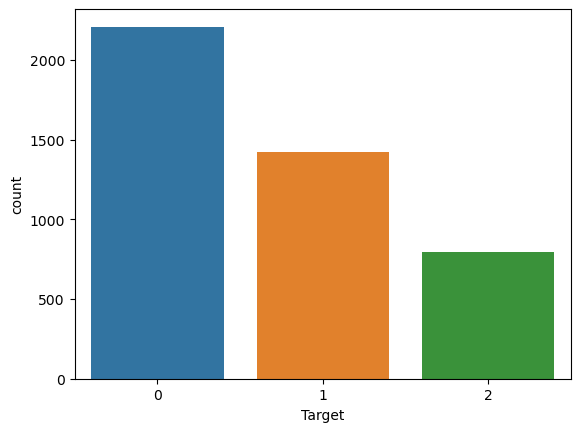

In [7]:
#Visualize the data
sns.countplot(x = 'Target', data=df)
plt.show()

In [8]:
#Separate data into labels and features
#Separate the y variable as the lable and the X variable as the features
y = df['Target']

X = df.drop(columns=['Target'])

In [9]:
#Review the y variable Series
y[:5]

0    1
1    0
2    1
3    0
4    0
Name: Target, dtype: int64

In [10]:
#Review the X variable DataFrame
X.head()

,Marital status,Daytime/evening attendance,Previous qualification,Nationality,Mother qualification,Father qualification,Tuition fees up to date,Gender,Scholarship holder,International,Age at enrollment,Curricular units 1st sem (grade),Curricular units 2nd sem (grade)
0,1,1,1,1,13,10,1,1,0,0,20,0.000000,0.000000
1,1,1,1,1,1,3,0,1,0,0,19,14.000000,13.666667
2,1,1,1,1,22,27,0,1,0,0,19,0.000000,0.000000
3,1,1,1,1,23,27,1,0,0,0,20,13.428571,12.400000
4,2,0,1,1,22,28,1,0,0,0,45,12.333333,13.000000


In [11]:
#Check the balance of our target values
y.value_counts()

Target
0    2209
1    1421
2     794
Name: count, dtype: int64

In [12]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
# Add 'stratify=y' so we have an even distribution of 1's and 0's within our model, so we have a representation of all of our data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=.2,
                                                    random_state=1,
                                                    )

In [13]:
#Create a StandardScaler instances
scaler = StandardScaler()

#Fit the StandardScaler
X_scaler = scaler.fit(X_train)

#Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
print(X_train_scaled.shape)

(3539, 13)


In [22]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid','elu','selu','softmax'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=13))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])


    return nn_model

In [23]:
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective='val_accuracy',
    max_epochs=100,
    hyperband_iterations=2
)

Reloading Tuner from ./untitled_project/tuner0.json


In [24]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

In [25]:
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'elu',
 'first_units': 5,
 'num_layers': 6,
 'units_0': 1,
 'units_1': 3,
 'units_2': 5,
 'units_3': 7,
 'units_4': 9,
 'units_5': 7,
 'tuner/epochs': 100,
 'tuner/initial_epoch': 34,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0217'}

In [21]:
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

28/28 - 0s - 4ms/step - accuracy: 0.7096 - loss: 0.0000e+00
Loss: 0.0, Accuracy: 0.7096045017242432


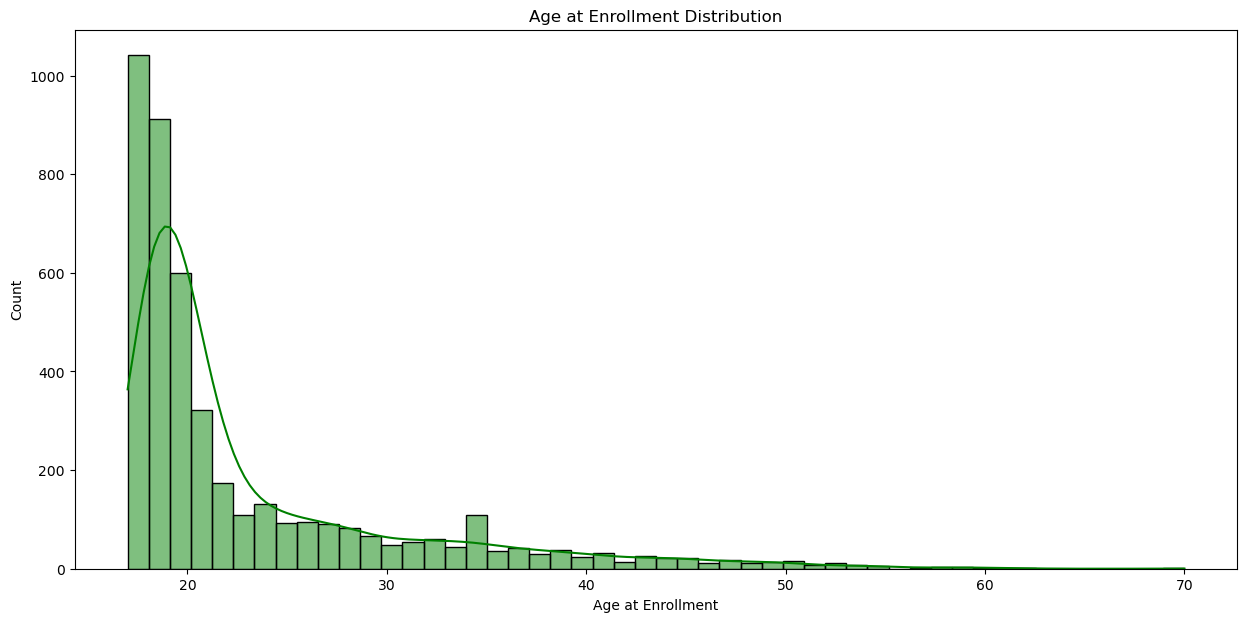

In [5]:
# Converting inf to NaN in the 'Age at enrollment' column
df['Age at enrollment'] = df['Age at enrollment'].replace([np.inf, -np.inf], np.nan)

# Ignoring FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(15, 7))
ax = sns.histplot(df['Age at enrollment'], bins=50, color='g', kde=True)
ax.set_title('Age at Enrollment Distribution')
ax.set_xlabel('Age at Enrollment')
ax.set_ylabel('Count')
plt.show()